In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nb0lpwpYXEsbbo5uinX3")
project = rf.workspace("liver-tumor").project("liver-tumor-detection")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Liver-Tumor-Detection-2 in yolov8:: 100%|██████████| 190/190 [00:00<00:00, 9155.66it/s]


In [ ]:
import os

# folder path
dir_path = r'/content/Liver-Tumor-Detection-2/train/images'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)


File count: 71


In [ ]:
pip install pyyaml


In [ ]:
import yaml

# Specify the path to your .yaml file
file_path = "/content/Liver-Tumor-Detection-2/data.yaml"

# Open and load the .yaml file
with open(file_path, 'r') as file:
    data = yaml.safe_load(file)

# Print the contents of the file
print(data)


{'names': ['Liver-Tumor'], 'nc': 1, 'roboflow': {'license': 'CC BY 4.0', 'project': 'liver-tumor-detection', 'url': 'https://universe.roboflow.com/liver-tumor/liver-tumor-detection/dataset/2', 'version': 2, 'workspace': 'liver-tumor'}, 'test': '../test/images', 'train': '../train/images', 'val': '../valid/images'}


In [ ]:
import yaml

# Paths to dataset folders
dataset_paths = {
    'train': '/content/Liver-Tumor-Detection-2/train',
    'val': '/content/Liver-Tumor-Detection-2/valid',
    'test': '/content/Liver-Tumor-Detection-2/test',
    'nc': 1,  # Number of classes
    'names': ['tumor']  # Class names
}

# Save the YAML file
with open('liver_tumor.yaml', 'w') as file:
    yaml.dump(dataset_paths, file)

print("liver_tumor.yaml created successfully!")


liver_tumor.yaml created successfully!


In [ ]:
!pip install ultralytics
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO

# Paths to your dataset and model
data_yaml = "/content/liver_tumor.yaml"  # Create this YAML file to define your dataset
model_save_path = "runs/detect/yolov11_liver_tumor"

# 1. Load the YOLOv11 model
model = YOLO("yolov8n.pt")  # Using YOLOv8 as YOLOv11 is currently based on Ultralytics core

# 2. Train the model
model.train(
    data=data_yaml,  # Path to the dataset YAML
    epochs=75,       # Number of epochs
    imgsz=640,       # Image size
    batch=16,        # Batch size
    name="liver_tumor_model.pt"  # Save results under this name
)

# 3. Evaluate the model
results = model.val()


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 74.3MB/s]


Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/liver_tumor.yaml, epochs=75, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=liver_tumor_model.pt, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 15.2MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 67.3MB/s]


AMP: checks passed ✅


train: Scanning /content/Liver-Tumor-Detection-2/train/labels... 71 images, 0 backgrounds, 0 corrupt: 100%|██████████| 71/71 [00:00<00:00, 2077.18it/s]

train: New cache created: /content/Liver-Tumor-Detection-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Liver-Tumor-Detection-2/valid/labels... 17 images, 0 backgrounds, 0 corrupt: 100%|██████████| 17/17 [00:00<00:00, 2288.51it/s]

val: New cache created: /content/Liver-Tumor-Detection-2/valid/labels.cache


Plotting labels to runs/detect/liver_tumor_model.pt/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/liver_tumor_model.pt
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75      2.22G      1.885      3.275      1.795         28        640: 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]

                   all         17         36     0.0051      0.722     0.0494     0.0236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75      2.16G      1.727      3.151      1.694         27        640: 100%|██████████| 5/5 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


                   all         17         36    0.00627      0.889      0.226      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      2.16G      1.326      2.447      1.475         34        640: 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         17         36    0.00706          1      0.151     0.0964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      2.17G      1.245      1.854      1.383         30        640: 100%|██████████| 5/5 [00:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         17         36    0.00706          1      0.316      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75       2.2G      1.171      1.716      1.326         31        640: 100%|██████████| 5/5 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all         17         36    0.00706          1      0.486      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75      2.17G      1.176      1.705      1.298         34        640: 100%|██████████| 5/5 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         17         36      0.925      0.389       0.58       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75      2.16G      1.105      1.587      1.296         15        640: 100%|██████████| 5/5 [00:01<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


                   all         17         36          1      0.153      0.607      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75      2.17G      1.157      1.407      1.237         26        640: 100%|██████████| 5/5 [00:01<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         17         36      0.904      0.262      0.587      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75      2.18G      1.141      1.521       1.27         25        640: 100%|██████████| 5/5 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         17         36      0.481      0.206      0.328      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      2.17G       1.22      1.593      1.334         28        640: 100%|██████████| 5/5 [00:01<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         17         36      0.702      0.196      0.357      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75      2.17G      1.198      1.506      1.312         36        640: 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         17         36      0.552       0.25      0.278      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75      2.19G      1.159       1.38      1.249         37        640: 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         17         36      0.763      0.139      0.328      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      2.18G      1.138      1.363      1.253         34        640: 100%|██████████| 5/5 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         17         36      0.807      0.111      0.366      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75      2.16G       1.07      1.272      1.253         32        640: 100%|██████████| 5/5 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         17         36      0.694      0.361      0.547      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75      2.18G      1.096      1.371      1.254         25        640: 100%|██████████| 5/5 [00:01<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         17         36      0.623      0.444      0.518      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75      2.18G      1.078      1.361      1.267         23        640: 100%|██████████| 5/5 [00:00<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         17         36      0.495      0.436       0.43      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75      2.17G     0.9771       1.18      1.148         23        640: 100%|██████████| 5/5 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all         17         36      0.648      0.665      0.683      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75      2.18G      1.105       1.24      1.236         30        640: 100%|██████████| 5/5 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         17         36      0.577      0.611      0.572      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75      2.17G      1.102      1.206      1.225         26        640: 100%|██████████| 5/5 [00:01<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         17         36      0.642      0.528       0.56      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75       2.2G       1.13       1.27      1.262         25        640: 100%|██████████| 5/5 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         17         36      0.792      0.423      0.537      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75      2.15G      1.146       1.32      1.263         35        640: 100%|██████████| 5/5 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         17         36       0.73      0.377      0.419      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75      2.17G      1.097      1.214      1.255         26        640: 100%|██████████| 5/5 [00:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         17         36      0.668      0.361      0.439      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75      2.18G      1.079      1.158      1.249         26        640: 100%|██████████| 5/5 [00:00<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         17         36      0.679      0.444      0.527      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75      2.17G      1.078      1.268      1.244         20        640: 100%|██████████| 5/5 [00:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]

                   all         17         36      0.757      0.333      0.443      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75      2.17G      1.083       1.28       1.25         14        640: 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         17         36      0.524      0.444      0.422      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75      2.19G      1.073      1.113      1.188         35        640: 100%|██████████| 5/5 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         17         36      0.543      0.462      0.472      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75      2.17G      1.091      1.163      1.237         22        640: 100%|██████████| 5/5 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


                   all         17         36      0.686      0.583        0.6      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75      2.17G      1.148       1.21      1.248         28        640: 100%|██████████| 5/5 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]

                   all         17         36      0.687      0.672      0.695      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75      2.18G      1.087      1.105      1.212         25        640: 100%|██████████| 5/5 [00:00<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         17         36      0.601      0.627      0.634      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75       2.2G      1.064      1.069      1.181         37        640: 100%|██████████| 5/5 [00:00<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         17         36      0.807      0.581      0.698      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75      2.18G       1.03     0.9916        1.2         32        640: 100%|██████████| 5/5 [00:00<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         17         36      0.547       0.75      0.694      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75      2.18G      1.031      1.034      1.163         31        640: 100%|██████████| 5/5 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         17         36      0.564      0.667      0.654      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75      2.17G     0.9992     0.9921      1.125         30        640: 100%|██████████| 5/5 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         17         36      0.453      0.778      0.616      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75       2.2G     0.9892      1.019      1.164         25        640: 100%|██████████| 5/5 [00:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         17         36      0.772      0.694      0.765      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75      2.17G     0.9991      0.986      1.197         25        640: 100%|██████████| 5/5 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         17         36      0.787      0.694      0.794      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75      2.17G      1.015     0.9914      1.149         28        640: 100%|██████████| 5/5 [00:01<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]


                   all         17         36      0.737      0.917      0.849      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75      2.17G     0.9546     0.9556      1.163         24        640: 100%|██████████| 5/5 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         17         36      0.833      0.861      0.869      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75      2.17G     0.9193     0.8734      1.112         21        640: 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]


                   all         17         36      0.885      0.858      0.909      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75      2.18G      1.032     0.9915      1.173         33        640: 100%|██████████| 5/5 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         17         36      0.876      0.889      0.946      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75      2.18G     0.9531     0.8697      1.138         31        640: 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         17         36      0.855      0.861      0.929      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75      2.17G     0.9381     0.8874      1.116         39        640: 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         17         36      0.911      0.853      0.924      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75      2.18G     0.9002     0.8862      1.107         27        640: 100%|██████████| 5/5 [00:01<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


                   all         17         36      0.879      0.917      0.937      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75      2.15G     0.9815      0.887      1.127         22        640: 100%|██████████| 5/5 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         17         36      0.917      0.944      0.953       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75      2.18G     0.9423     0.8202      1.097         30        640: 100%|██████████| 5/5 [00:01<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


                   all         17         36      0.878      0.917      0.937      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75      2.17G     0.9001     0.8429       1.09         30        640: 100%|██████████| 5/5 [00:01<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]

                   all         17         36      0.916      0.912      0.938       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75      2.18G     0.9737     0.8977      1.162         34        640: 100%|██████████| 5/5 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         17         36      0.848      0.933      0.938      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75      2.17G     0.8737     0.8133      1.102         35        640: 100%|██████████| 5/5 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         17         36      0.802      0.903      0.906      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75      2.18G     0.9903     0.8432      1.129         23        640: 100%|██████████| 5/5 [00:01<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         17         36      0.703      0.856      0.807      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75      2.17G     0.8951        0.8      1.102         29        640: 100%|██████████| 5/5 [00:01<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         17         36      0.721      0.935      0.852      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75      2.18G     0.9485     0.8716      1.139         24        640: 100%|██████████| 5/5 [00:00<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         17         36      0.663      0.917      0.832      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/75      2.18G     0.9316     0.7905       1.12         24        640: 100%|██████████| 5/5 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         17         36      0.745      0.889      0.875      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75      2.17G     0.9326     0.8131      1.115         26        640: 100%|██████████| 5/5 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]

                   all         17         36      0.772      0.938       0.89      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75      2.17G     0.8555     0.7883      1.104         31        640: 100%|██████████| 5/5 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all         17         36      0.832          1      0.936      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75       2.2G     0.8598     0.8567      1.103         18        640: 100%|██████████| 5/5 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]


                   all         17         36      0.833          1      0.936      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75      2.18G     0.8931     0.8192       1.13         22        640: 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         17         36       0.83          1      0.935      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75      2.18G     0.8626     0.7628      1.094         20        640: 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         17         36      0.872      0.946      0.952       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75      2.17G     0.8709     0.7672      1.093         41        640: 100%|██████████| 5/5 [00:01<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         17         36      0.888      0.972      0.954       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75      2.17G     0.8583     0.7917      1.056         28        640: 100%|██████████| 5/5 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all         17         36      0.897      0.966      0.959      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75      2.18G     0.9067     0.7703      1.086         27        640: 100%|██████████| 5/5 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         17         36      0.863      0.972      0.958      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75      2.18G     0.8382     0.7093      1.057         32        640: 100%|██████████| 5/5 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         17         36      0.894      0.972       0.97       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75      2.17G     0.8438     0.7205      1.061         26        640: 100%|██████████| 5/5 [00:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         17         36       0.92      0.962      0.973      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75      2.18G     0.7975     0.6771      1.048         23        640: 100%|██████████| 5/5 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         17         36      0.907      0.944      0.972      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75      2.18G     0.7704     0.6852      1.024         30        640: 100%|██████████| 5/5 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         17         36      0.854      0.944      0.961      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75      2.17G     0.8063     0.6962      1.037         30        640: 100%|██████████| 5/5 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         17         36       0.86      0.889      0.952      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75      2.17G     0.8174     0.6801      1.057         33        640: 100%|██████████| 5/5 [00:00<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         17         36      0.885      0.833      0.951      0.723


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75      2.16G     0.7782     0.7518      1.021         12        640: 100%|██████████| 5/5 [00:01<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         17         36      0.863      0.889      0.947      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/75      2.15G     0.7701     0.6552      1.019         21        640: 100%|██████████| 5/5 [00:00<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         17         36       0.88      0.889      0.942      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/75      2.15G     0.7861     0.6523      1.039         16        640: 100%|██████████| 5/5 [00:00<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all         17         36       0.87      0.889      0.942      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/75      2.15G     0.7635     0.6564      1.019         20        640: 100%|██████████| 5/5 [00:00<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         17         36       0.87      0.917      0.945      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/75      2.16G     0.7459     0.6349      1.002         14        640: 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         17         36      0.892      0.916      0.948       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/75      2.15G     0.7525     0.6297      1.011         15        640: 100%|██████████| 5/5 [00:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         17         36      0.871      0.889      0.946      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/75      2.16G     0.7365     0.6228      1.006         15        640: 100%|██████████| 5/5 [00:01<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         17         36      0.877      0.889      0.942       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/75      2.15G      0.764     0.7239      1.051         19        640: 100%|██████████| 5/5 [00:00<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


                   all         17         36      0.864      0.861       0.94      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/75      2.16G     0.7374     0.6652      1.028         12        640: 100%|██████████| 5/5 [00:00<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all         17         36      0.866      0.896      0.943      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/75      2.15G       0.71     0.6279     0.9801         15        640: 100%|██████████| 5/5 [00:00<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]


                   all         17         36      0.853      0.889      0.942      0.738

75 epochs completed in 0.048 hours.
Optimizer stripped from runs/detect/liver_tumor_model.pt/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/liver_tumor_model.pt/weights/best.pt, 6.3MB

Validating runs/detect/liver_tumor_model.pt/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]


                   all         17         36      0.889      0.889      0.943      0.743
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/liver_tumor_model.pt
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Liver-Tumor-Detection-2/valid/labels.cache... 17 images, 0 backgrounds, 0 corrupt: 100%|██████████| 17/17 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]


                   all         17         36      0.864      0.861      0.943      0.744
Speed: 0.3ms preprocess, 19.0ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/liver_tumor_model.pt2


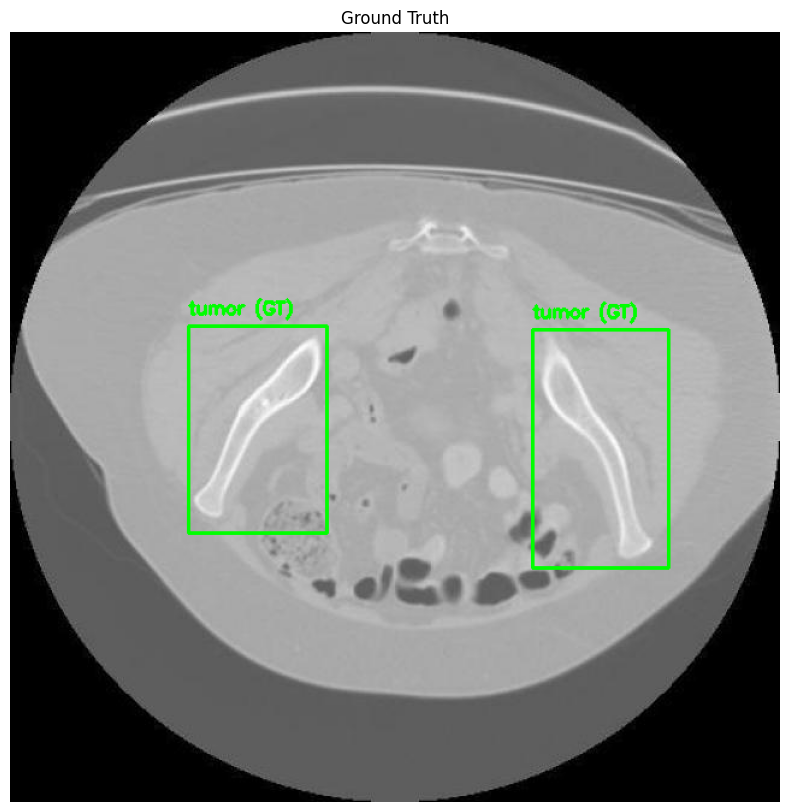


image 1/1 /content/Liver-Tumor-Detection-2/valid/images/image-0033_jpg.rf.72c970c29fbe513a8c51b5b7012d0dec.jpg: 640x640 3 tumors, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


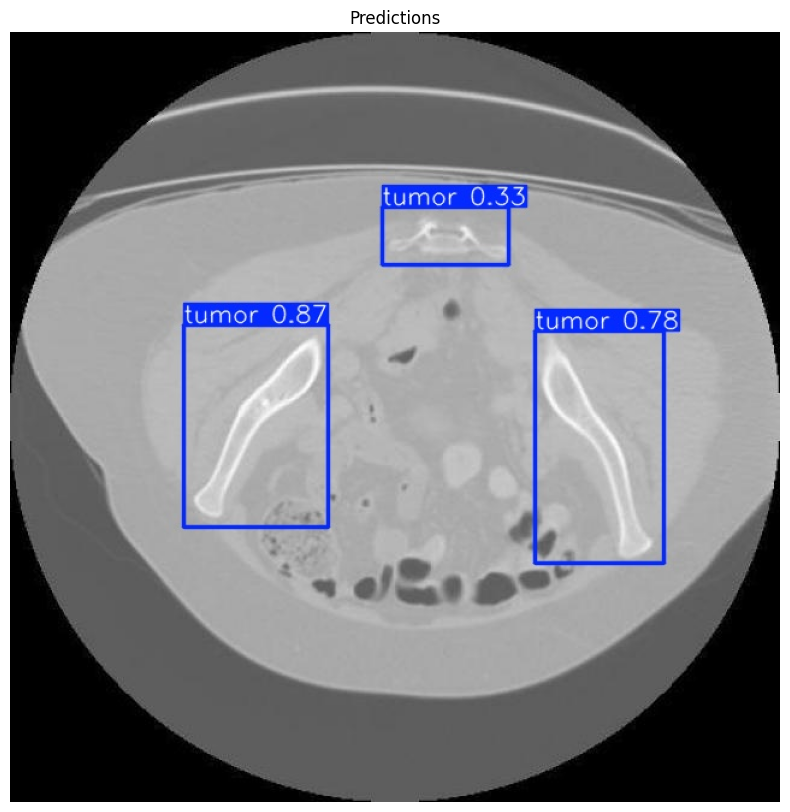

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os

def plot_ground_truth(image_path, label_path):
    """
    Plots the ground-truth bounding boxes from the label file on the given image.
    """
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Read label file and draw boxes
    with open(label_path, "r") as file:
        for line in file:
            data = line.strip().split()
            cls, cx, cy, w, h = map(float, data)

            # Convert normalized coordinates (cx, cy, w, h) to pixel coordinates
            height, width, _ = img.shape
            x1 = int((cx - w / 2) * width)
            y1 = int((cy - h / 2) * height)
            x2 = int((cx + w / 2) * width)
            y2 = int((cy + h / 2) * height)

            # Draw the bounding box (green for ground-truth)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, "tumor (GT)", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.title("Ground Truth")
    plt.show()

    return img


def test_model(image_path, model_path="/content/runs/detect/liver_tumor_model.pt/weights/best.pt"):
    """
    Uses the trained YOLOv8 model to predict bounding boxes on the given image.
    """
    # Load the trained model
    model = YOLO(model_path)

    # Run inference on the image
    results = model.predict(source=image_path, save=True)

    # Check if image0.jpg is created
    result_img_path = "/content/runs/detect/predict4/image-0033_jpg.rf.72c970c29fbe513a8c51b5b7012d0dec.jpg"
    if not os.path.exists(result_img_path):
        print(f"Error: {result_img_path} does not exist.")
        return

    # Visualize predictions
    results_img = cv2.imread(result_img_path)
    if results_img is None:
        print(f"Error: Failed to read {result_img_path}.")
        return

    results_img = cv2.cvtColor(results_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.imshow(results_img)
    plt.axis("off")
    plt.title("Predictions")
    plt.show()



# Paths to image and label file
image_path = "/content/Liver-Tumor-Detection-2/valid/images/image-0033_jpg.rf.72c970c29fbe513a8c51b5b7012d0dec.jpg"  # Replace with the image path
label_path = "/content/Liver-Tumor-Detection-2/valid/labels/image-0033_jpg.rf.72c970c29fbe513a8c51b5b7012d0dec.txt"  # Replace with the corresponding label file path

# 1. Plot Ground Truth
gt_img = plot_ground_truth(image_path, label_path)

# 2. Test the Model
test_model(image_path)



image 1/1 /content/IMG-20250503-WA0038.jpg: 576x640 (no detections), 324.3ms
Speed: 12.3ms preprocess, 324.3ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 640)


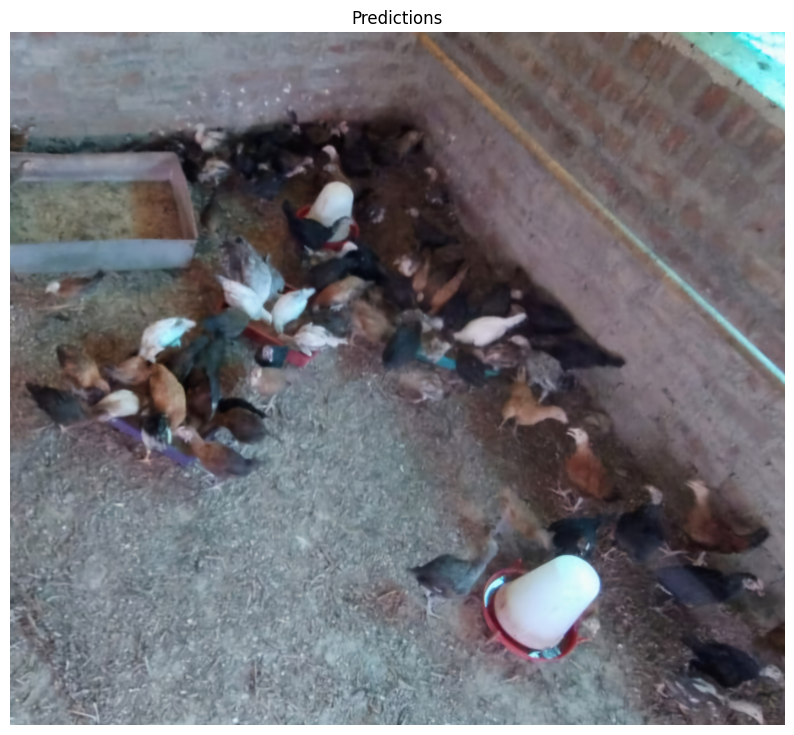

Output image saved as output1.jpg


In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

def test_model(image_path, model_path="/content/chickencounter.pt"):
    """
    Uses the trained YOLOv8 model to predict bounding boxes on the given image.
    The output image is saved as 'output1.jpg' with bounding boxes drawn.
    """
    # Load the trained model
    model = YOLO(model_path)

    # Run inference on the image
    results = model.predict(source=image_path, save=False)  # Do not save in 'runs/detect/'

    # Extract bounding boxes, labels, and confidences
    boxes = results[0].boxes.xyxy  # Get the bounding box coordinates
    labels = results[0].boxes.cls  # Get the class labels
    confidences = results[0].boxes.conf  # Get the confidence scores

    # Load the image
    img = cv2.imread(image_path)

    # Loop through the results and draw the bounding boxes on the image
    for i in range(len(boxes)):
        x1, y1, x2, y2 = map(int, boxes[i])  # Convert box coordinates to integers
        label = int(labels[i])  # Convert label to integer
        confidence = confidences[i]  # Confidence score

        # Draw the bounding box (Blue for bounding box, Red for the label)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red rectangle
        text = f"Class {label} ({confidence:.2f})"
        cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Save the image with bounding boxes as 'output1.jpg'
    output_path = "output1.jpg"
    cv2.imwrite(output_path, img)

    # Visualize predictions
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Predictions")
    plt.show()

    print(f"Output image saved as {output_path}")


# Example usage
image_path = "/content/IMG-20250503-WA0038.jpg"  # Replace with your image path

# Test the Model and save the result as output1.jpg
test_model(image_path)



image 1/1 /content/Liver-Tumor-Detection-2/valid/images/image-0033_jpg.rf.72c970c29fbe513a8c51b5b7012d0dec.jpg: 640x640 3 tumors, 8.4ms
Speed: 2.0ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


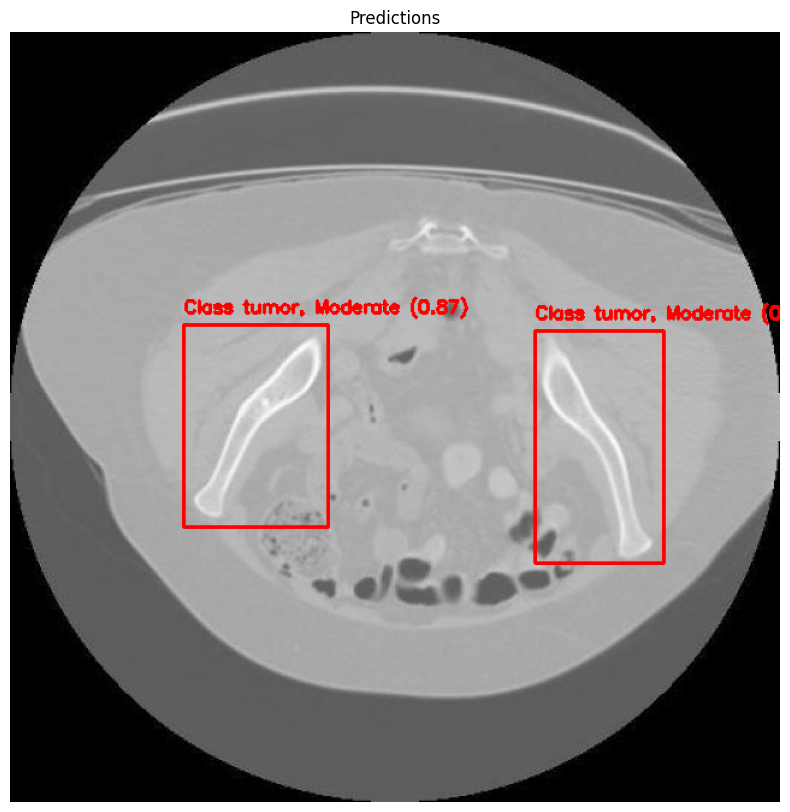

Output image saved as output1.jpg

Tumor Details:
Tumor 1: {'label': 'tumor', 'confidence': 0.87, 'area': 1411.2874996444, 'size': '31.749999996mm x 44.4499999944mm', 'location': 'Lower Left lobe', 'severity': 'Moderate'}
Tumor 2: {'label': 'tumor', 'confidence': 0.78, 'area': 1445.659630712128, 'size': '28.3104166631mm x 51.0645833269mm', 'location': 'Lower Right lobe', 'severity': 'Moderate'}


In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

def test_model(image_path, model_path="/content/runs/detect/liver_tumor_model.pt/weights/best.pt"):
    """
    Enhances the YOLO model predictions by calculating tumor size, location, severity, and count.
    """
    # Load the trained model
    model = YOLO(model_path)

    # Run inference on the image
    results = model.predict(source=image_path, save=False)  # Do not save in 'runs/detect/'

    # Extract bounding boxes, labels, and confidences
    boxes = results[0].boxes.xyxy  # Bounding box coordinates
    labels = results[0].boxes.cls  # Class labels
    confidences = results[0].boxes.conf  # Confidence scores

    # Load the image
    img = cv2.imread(image_path)

    # Tumor details
    tumor_details = []

    # Loop through results and process each bounding box
    for i in range(len(boxes)):
        x1, y1, x2, y2 = map(int, boxes[i])  # Convert box coordinates to integers
        label = int(labels[i])  # Convert label to integer
        confidence = confidences[i]  # Confidence score

        if confidence < 0.5:
          continue

        # label name
        if label == 0:
            label = "tumor"

        # Calculate size (area) of the tumor
        width = (x2 - x1) * 0.2645833333
        height = (y2 - y1) * 0.2645833333
        area = width * height

        # Determine severity based on tumor size
        if area < 1000:
            severity = "Low"
        elif 1000 <= area < 5000:
            severity = "Moderate"
        else:
            severity = "High"

        # Determine tumor location (e.g., divide liver into quadrants)
        center_x, center_y = (x1 + x2) // 2, (y1 + y2) // 2
        if center_x < img.shape[1] // 2 and center_y < img.shape[0] // 2:
            location = "Upper Left lobe"
        elif center_x >= img.shape[1] // 2 and center_y < img.shape[0] // 2:
            location = "Upper Right lobe"
        elif center_x < img.shape[1] // 2 and center_y >= img.shape[0] // 2:
            location = "Lower Left lobe"
        else:
            location = "Lower Right lobe"

        # Append details
        tumor_details.append({
            "label": label,
            "confidence": round(float(confidence), 2),
            "area": area,
            "size": f"{width}mm x {height}mm",
            "location": location,
            "severity": severity
        })

        # Draw the bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        text = f"Class {label}, {severity} ({confidence:.2f})"
        cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Save the image with bounding boxes as 'output1.jpg'
    output_path = "output1.jpg"
    cv2.imwrite(output_path, img)

    # Visualize predictions
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Predictions")
    plt.show()

    print(f"Output image saved as {output_path}")
    print("\nTumor Details:")
    for i, tumor in enumerate(tumor_details, 1):
        print(f"Tumor {i}: {tumor}")

# Example usage
image_path = "/content/Liver-Tumor-Detection-2/valid/images/image-0033_jpg.rf.72c970c29fbe513a8c51b5b7012d0dec.jpg"  # Replace with your image path

# Test the model and save the result as output1.jpg
test_model(image_path)
